## create a connection to the database using the library sqlite3

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [3]:
conn = sqlite3.connect('../ex00/data/checking-logs.sqlite.sqlite copy')

In [69]:
weekend = pd.io.sql.read_sql("""
SELECT CAST(strftime('%H', timestamp) as integer) as hour
FROM checker
WHERE strftime('%w', timestamp) in ('0', '6') and uid like 'user_%'
""", conn)
working = pd.io.sql.read_sql("""
SELECT CAST(strftime('%H', timestamp) as integer) as hour
FROM checker
WHERE strftime('%w', timestamp) not in ('0', '6') and uid like 'user_%' 
""", conn)
conn.close()

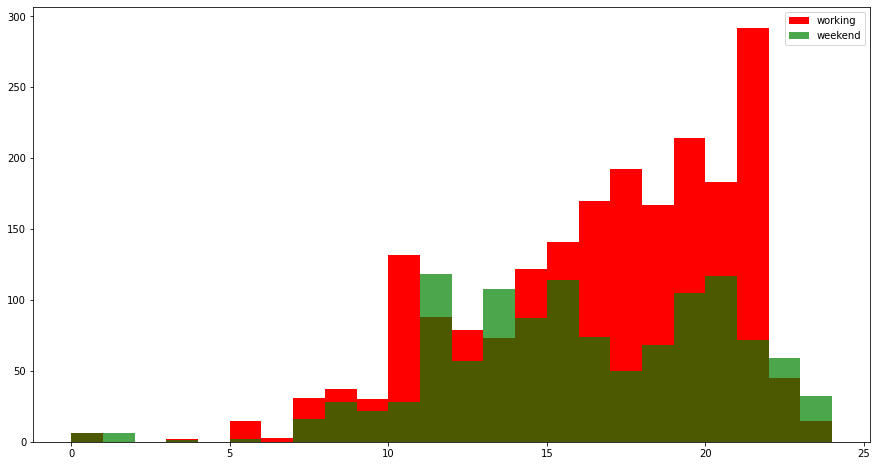

In [70]:
hours = list(range(25))
plt.figure(figsize=(15, 8))
working_plot = plt.hist(working['hour'].values, bins=hours, label='working', color='red')
weekend_plot = plt.hist(weekend['hour'].values, bins=hours, alpha=0.7, label='weekend', color='green')  # density=False would make counts
plt.legend(['working', 'weekend'])

## ““Are there hours when the total number of commits was higher on weekends than on working days?””
#### 12, 14, 23, 00